<a href="https://colab.research.google.com/github/mvlier/topapprox/blob/main/Paper%20examples/Reproducing_paper_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BEWARE:** Some cells might show an error when running for the first time. In that case running that cell one more time should resolve the problem.

# Installing necessary packages

In [1]:
!pip install git+https://github.com/mvlier/topapprox@main
!pip install -U -q cripser persim plotly kaleido

  Cloning https://github.com/mvlier/topapprox (to revision main) to /tmp/pip-req-build-b_ltl6xv
  Running command git clone --filter=blob:none --quiet https://github.com/mvlier/topapprox /tmp/pip-req-build-b_ltl6xv
  Resolved https://github.com/mvlier/topapprox to commit d4bdac1e80a33254927c71c96859de4563e78a2a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for topapprox: filename=topapprox-0.0.2-py3-none-any.whl size=9397 sha256=cf8350dd73e1ef7da2dfa1c892a0f8770f4b94942135c7a95ffc119e8555bbc2
  Stored in directory: /tmp/pip-ephem-wheel-cache-sy4ssjvn/wheels/49/17/71/71c98f055e9b71cd32cab64370e89376d750f95bf7f991d9c2
Successfully built topapprox
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.0 MB/s eta 0:00:00


In [1]:
import topapprox as ta
import cripser
import persim
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import sys,os

import warnings
warnings.filterwarnings("ignore")

# Example V.1 (1D signal)

Text(0.5, 1.0, '0-LPF eps=2.4')

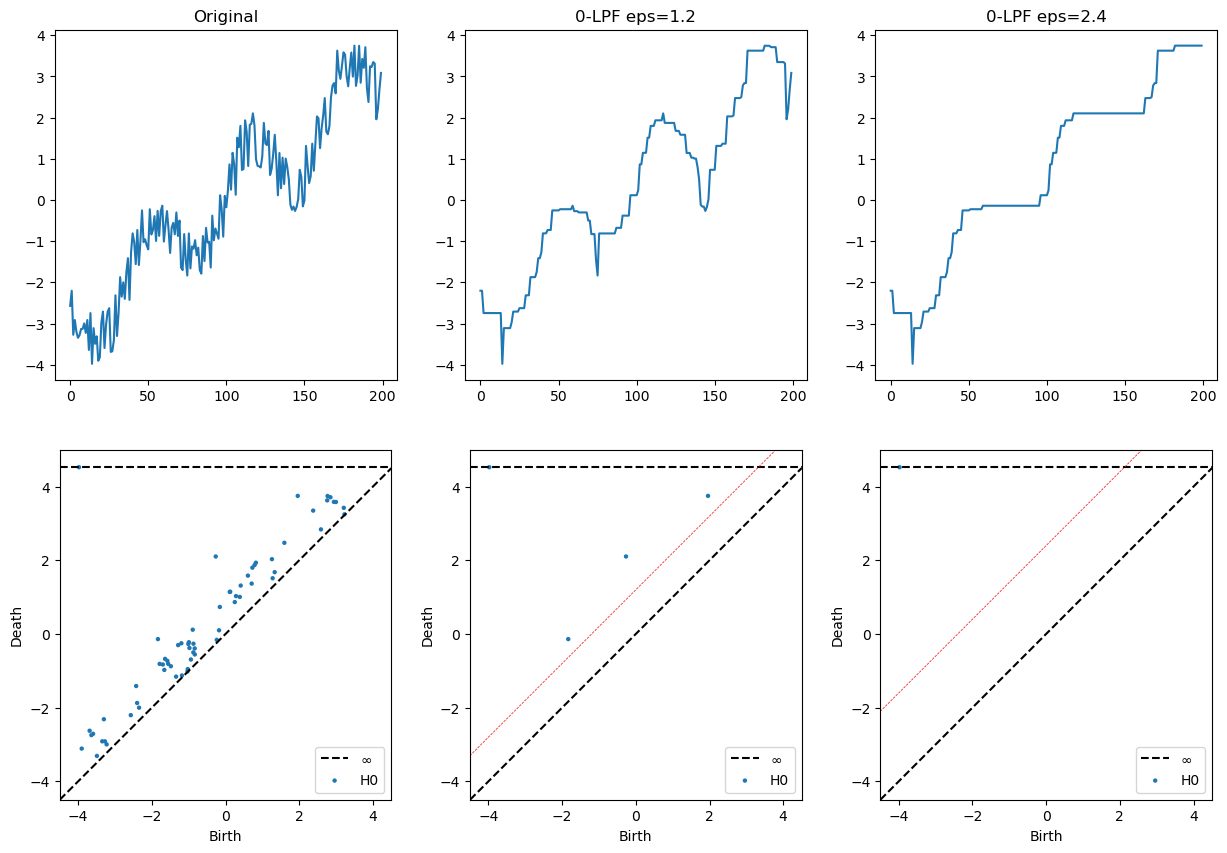

In [2]:
##################
# Creating Signal#
##################

m=200 # resolution
noise = 0.7 # noise level
s=1.2 ## life threshold = simplification strength

# create a sample signal
y, x = np.mgrid[0:1, -10:10:m*1j]
img = np.sin(x)+0.3*x
img_original = img.copy()
np.random.seed(1)
img += np.random.uniform(-noise,noise,img.shape)


#################################
# Computing and plotting results#
#################################

fig, axs = plt.subplots(2,3,figsize=(15,10))

# original signal and persistence
axs[0,0].plot(img.ravel())
uf = ta.TopologicalFilterImage(img)
# try:
#     newimg = uf.low_pers_filter(epsilon=0)
# except:
#     pass
newimg = uf.low_pers_filter(epsilon=0)
PD = cripser.computePH(newimg)
PD = [PD[PD[:,0]==i,1:3] for i in range(2)]
persim.plot_diagrams(PD,labels=["H0"],size=10,ax=axs[1,0], xy_range = [-4.5,4.5,-4.5,5])
#axs[1,0].plot([-5,5], [-5+s,5+s], '--', linewidth=0.5, c="r")
axs[0,0].set_title(f'Original')


s=1.2
# lpf_0 with eps = 1.2
img2 = uf.low_pers_filter(epsilon=s)
axs[0,1].plot(img2.ravel(), label="Filtered function")
#axs[0,1].plot(img_original.ravel(), label="Trend")
#axs[0,1].legend(loc='lower right')
uf2 = ta.TopologicalFilterImage(img2)
newimg = uf.low_pers_filter(epsilon=s)
PD = cripser.computePH(newimg)
PD = [PD[PD[:,0]==i,1:3] for i in range(2)]
persim.plot_diagrams(PD,labels=["H0"],size=10,ax=axs[1,1], xy_range = [-4.5,4.5,-4.5,5])
axs[1,1].plot([-5,5], [-5+s,5+s], '--', linewidth=0.5, c="r")
axs[0,1].set_title(f'0-LPF eps={s}')


s = 2.4
# lpf_0 with eps = 2.4
img2 = uf.low_pers_filter(epsilon=s)
axs[0,2].plot(img2.ravel())
uf2 = ta.TopologicalFilterImage(img2)
newimg = uf.low_pers_filter(epsilon=s)
PD = cripser.computePH(newimg)
PD = [PD[PD[:,0]==i,1:3] for i in range(2)]
persim.plot_diagrams(PD,labels=["H0"],size=10,ax=axs[1,2],xy_range = [-4.5,4.5,-4.5,5] )
axs[1,2].plot([-5,5], [-5+s,5+s], '--', linewidth=0.5, c="r")
axs[0,2].set_title(f'0-LPF eps={s}')

# plt.savefig('1D-toy-example.pdf')

# Example V.2 (2D signal)

In [22]:
# Defining the scalar field to be used in the example
def scalar_field(x,y):
    np.random.seed(0)
    M = 300
    a = np.random.rand(M, 2)*8 + 1
    c = np.random.rand(M)*0.3 + 0.1
    b = 100
    m = c.size
    result = 0
    for i in range(m):
        result += 1 / (b*(x - a[i][0])**2 + b*(y - a[i][1])**2 + c[i])

    a = np.random.rand(M, 2)*8 + 1
    c = np.random.rand(M)*0.3 + 0.1
    m = c.size
    result2 = 0
    for i in range(m):
        result2 += 1 / (b*(x - a[i][0])**2 + b*(y - a[i][1])**2 + c[i])

    Z = result - result2
    Z2 = (x-5)**2 + 3*(y-5)**2
    Z = Z + Z2

    return Z

x = np.linspace(0, 10, 500)
y = np.linspace(0, 10, 500)
X, Y = np.meshgrid(x, y)
surface = scalar_field(X, Y)

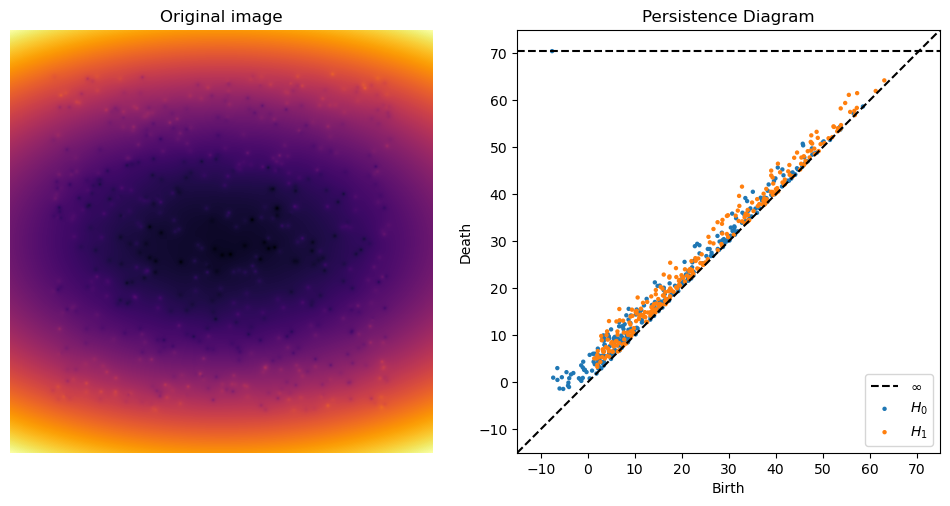

In [37]:
# Plotting original image with its persistence diagram
fig, ax = plt.subplots(1,2, figsize=(12,24))
ax[0].imshow(surface, cmap='inferno')
ax[0].axis('off')
ax[0].title.set_text('Original image')
PD = cripser.computePH(surface)
PD = [PD[PD[:,0]==i,1:3] for i in range(2)]
persim.plot_diagrams(PD,size=10,ax=ax[1], xy_range = [-15,75,-15,75])
ax[1].title.set_text('Persistence Diagram')

In [23]:
# 3D plot settings for better visualization
def plot3D(M, *, with_titles=False, title=None, vmin=None, vmax=None):
    x = np.linspace(0, 500, M.shape[1])  # X-coordinates
    y = np.linspace(0, 500, M.shape[0])  # Y-coordinates
    X, Y = np.meshgrid(x, y)  # Create the meshgrid for X and Y

    # Plot the matrix M in 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Use plot_surface to plot the matrix M
    ax.plot_surface(X, Y, M, cmap='viridis', vmin=vmin, vmax=vmax)

    # Change the perspective
    ax.view_init(elev=10, azim=20)


    # ax.set_ylim(-5,5)
    ax.set_zlim(-10,25)
    # ax.set_xlim(-10,2)

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])

    # x = np.linspace(0, 500, M.shape[1])  # X-coordinates
    # y = np.linspace(0, 500, M.shape[0])  # Y-coordinates
    # X, Y = np.meshgrid(x, y)  # Create the meshgrid for X and Y
    # X, Y = np.meshgrid(x, y)  # Create the meshgrid for X and Y
    ax.plot_surface(X[:, -10:], Y[:, -10:], M[:, -10:], color='red', vmin=vmin, vmax=vmax)
    ax.plot_surface(X[-5:, :], Y[-5:, :], M[-5:, :], color='blue', vmin=vmin, vmax=vmax)
    ax.plot_surface(X[:, :10], Y[:, :10], M[:, :10]+0.5, color='red', vmin=vmin, vmax=vmax)
    ax.plot_surface(X[:5, :], Y[:5, :], M[:5, :]+0.5, color='blue', vmin=vmin, vmax=vmax)

    # ax.grid(False)
    # ax.axis('off')

    if with_titles:
        plt.title(title, fontsize = 26)

    #plt.show()
    #plt.savefig('shekel-simplified.pdf', bbox_inches='tight')

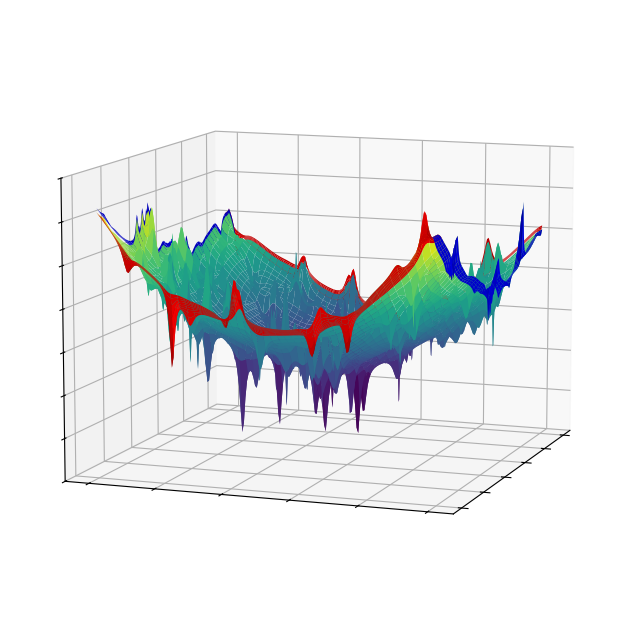

In [24]:
plot3D(surface[150:350, 150:400])

In [44]:
def save_image_and_persistence_diagram(img, name, xy_range=None, epsilon=None):
    """
    Saves the given image and its persistence diagram.
    
    Parameters:
    img (numpy.ndarray): The image to be saved.
    name (str): The name of the image file to save.
    xy_range (tuple, optional): The range for the x and y axes in the persistence diagram.
    """
    # Ensure the output directory exists
    os.makedirs('image', exist_ok=True)
    name = "image/" + name

    # Save the image
    plot3D(img[150:350, 150:400])
    plt.savefig(name + '.pdf', bbox_inches='tight', pad_inches=0)
    plt.close()


    # Save the persistence diagram
    fig, ax = plt.subplots(figsize=(6, 6))  # Adjust as needed
    PD = cripser.computePH(img)
    PD = [PD[PD[:, 0] == i, 1:3] for i in range(2)]

    persim.plot_diagrams(PD, size=10, ax=ax, xy_range=xy_range)
    if epsilon is not None:
        ax.plot([-100, 100], [-100 + epsilon, 100 + epsilon], '--', linewidth=1, c="r")
    # Remove title if auto-added
    ax.set_title("")
    plt.savefig(name + "_pd.pdf", bbox_inches='tight')
    plt.close()

In [53]:
# Filtering persitent 0-homology
tf3D_0 = ta.TopologicalFilterImage(surface)
surface_0 = tf3D_0.low_pers_filter(10) #Filtering all finite persistence

#Filtering persitent 1-homology
tf3D_1 = ta.TopologicalFilterImage(surface_0, dual=True)
surface_filtered_10 = tf3D_1.low_pers_filter(10)

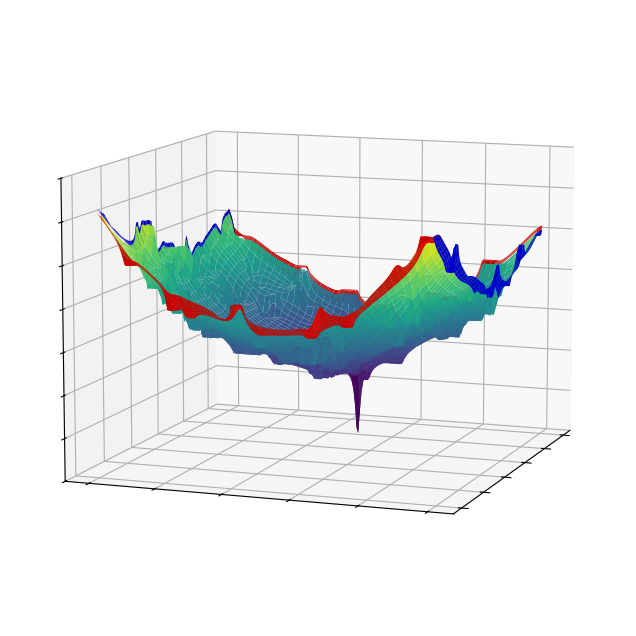

In [49]:
plot3D(surface_filtered_10[150:350, 150:400])

In [55]:
eps = 4
# Filtering persitent 0-homology
tf3D_0 = ta.TopologicalFilterImage(surface)
surface_0 = tf3D_0.low_pers_filter(eps) #Filtering all finite persistence

#Filtering persitent 1-homology
tf3D_1 = ta.TopologicalFilterImage(surface_0, dual=True)
surface_filtered_4 = tf3D_1.low_pers_filter(eps)

In [56]:
save_image_and_persistence_diagram(surface, "shekel-original", xy_range = [-15,75,-15,75])
save_image_and_persistence_diagram(surface_filtered_4, "shekel-filtered_4", xy_range = [-15,75,-15,75], epsilon=4)
save_image_and_persistence_diagram(surface_filtered_10, "shekel-filtered_10", xy_range = [-15,75,-15,75], epsilon=10)

# Example V.3 (Natural image)

In [2]:
# download image
download_url = "https://github.com/mvlier/topapprox/raw/main/Paper%20examples/pagoda.npy"
fn = "pagoda.npy"
if not os.path.isfile(fn):
    urllib.request.urlretrieve(download_url, fn)

img = np.load(fn)

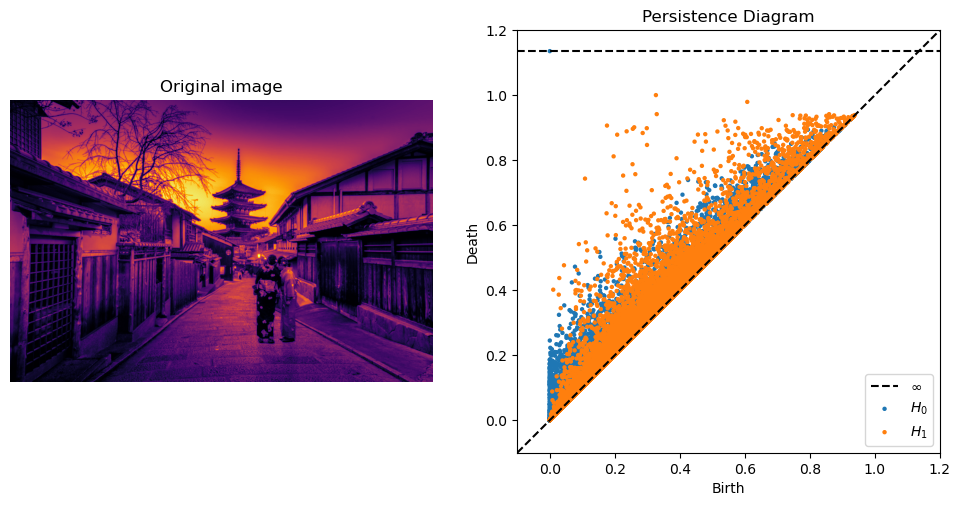

In [5]:
# Plotting original image with its persistence diagram
fig, ax = plt.subplots(1,2, figsize=(12,24))
ax[0].imshow(img, cmap='inferno')
ax[0].axis('off')
ax[0].title.set_text('Original image')
PD = cripser.computePH(img)
PD = [PD[PD[:,0]==i,1:3] for i in range(2)]
persim.plot_diagrams(PD,size=10,ax=ax[1],xy_range = [-0.1,1.2,-0.1,1.2])
ax[1].title.set_text('Persistence Diagram')

In [8]:
# Save original image
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))  # Adjust as needed
ax.imshow(img, cmap='inferno', aspect='equal')
ax.axis('off')
ax.set_adjustable('box')  # Keeps the aspect ratio consistent
plt.savefig('image/original_image.pdf', bbox_inches='tight', pad_inches=0)
plt.close()


# Save the persistence diagram
fig, ax = plt.subplots(figsize=(6, 6))  # Adjust as needed
PD = cripser.computePH(img)
PD = [PD[PD[:, 0] == i, 1:3] for i in range(2)]

persim.plot_diagrams(PD, size=10, ax=ax, xy_range=[-0.1, 1.2, -0.1, 1.2])
# Remove title if auto-added
ax.set_title("")
plt.savefig('image/original_image_pd.pdf', bbox_inches='tight')
plt.close()

In [10]:
# Filtering image by a threshold of 0.0704
e1 = 0.0704

# Filtering persitent 0-homology
tf_imga_0 = ta.TopologicalFilterImage(img)
img_1 = tf_imga_0.low_pers_filter(e1)

#Filtering persitent 1-homology
tf_imga_1 = ta.TopologicalFilterImage(img_1, dual=True)
imga = tf_imga_1.low_pers_filter(e1)


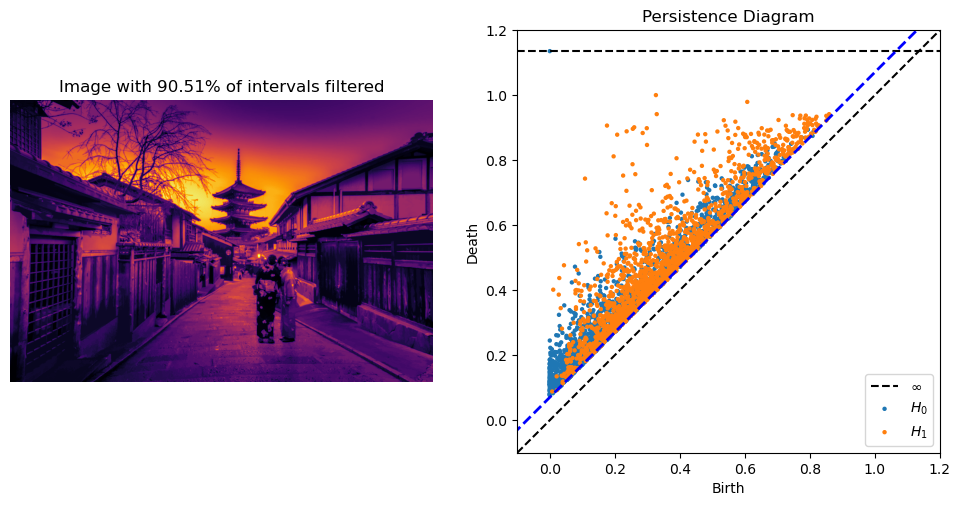

In [11]:
# Plotting original image with its persistence diagram
fig, ax = plt.subplots(1,2, figsize=(12,24))
ax[0].imshow(imga, cmap='inferno')
ax[0].axis('off')
ax[0].title.set_text('Image with 90.51% of intervals filtered')
PDa = cripser.computePH(imga)
PDa = [PDa[PDa[:,0]==i,1:3] for i in range(2)]
persim.plot_diagrams(PDa,size=10,ax=ax[1],xy_range = [-0.1,1.2,-0.1,1.2])
ax[1].title.set_text('Persistence Diagram')
ax[1].plot([-100,100], [-100+e1,100+e1], '--', linewidth=2.0, c="b")

In [12]:
percentage_filtered_a = (1 - (PDa[0].size + PDa[1].size) / (PD[0].size + PD[1].size)) * 100
print(f'The exact percentage of filtered intervals in the case above is {percentage_filtered_a}')

The exact percentage of filtered intervals in the case above is 90.50826554087708


In [14]:
import matplotlib.pyplot as plt

# Save figure
fig, ax = plt.subplots(figsize=(6, 6))  # Adjust size as needed
ax.imshow(imga, cmap='inferno', aspect='equal')
ax.axis('off')
ax.set_adjustable('box')  # Keep aspect ratio
plt.savefig('image/filtered_image0905.pdf', bbox_inches='tight', pad_inches=0)
plt.close()

# Save the persistence diagram
# Compute persistence
PDa = cripser.computePH(imga)
PDa = [PDa[PDa[:, 0] == i, 1:3] for i in range(2)]

# Plot diagram
fig, ax = plt.subplots(figsize=(6, 6))
persim.plot_diagrams(PDa, size=10, ax=ax, xy_range=[-0.1, 1.2, -0.1, 1.2])
ax.set_title("")

# Add blue offset diagonal line (death = birth + e1)
ax.plot([-100, 100], [-100 + e1, 100 + e1], '--', linewidth=2.0, c='b')

plt.savefig('image/filtered_image0905_pd.pdf', bbox_inches='tight')
plt.close()


In [18]:
# Filtering image by a threshold of 0.3022
e2 = 0.3022

# Filtering persitent 0-homology
tf_imgb_0 = ta.TopologicalFilterImage(img)
imgb_1 = tf_imgb_0.low_pers_filter(e2)

#Filtering persitent 1-homology
tf_imgb_1 = ta.TopologicalFilterImage(imgb_1, dual=True)
imgb = tf_imgb_1.low_pers_filter(e2)

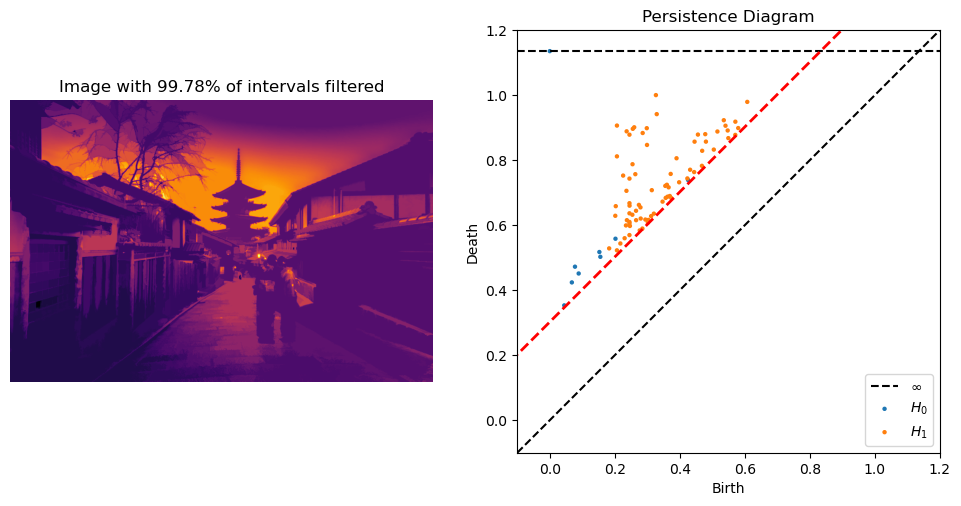

In [19]:
# Plotting original image with its persistence diagram
fig, ax = plt.subplots(1,2, figsize=(12,24))
ax[0].imshow(imgb, cmap='inferno')
ax[0].axis('off')
ax[0].title.set_text('Image with 99.78% of intervals filtered')
PDb = cripser.computePH(imgb)
PDb = [PDb[PDb[:,0]==i,1:3] for i in range(2)]
persim.plot_diagrams(PDb, size=10,ax=ax[1],xy_range = [-0.1,1.2,-0.1,1.2])
ax[1].title.set_text('Persistence Diagram')
ax[1].plot([-100,100], [-100+e2,100+e2], '--', linewidth=2.0, c="r")

In [20]:
percentage_filtered_b = (1 - (PDb[0].size + PDb[1].size) / (PD[0].size + PD[1].size)) * 100
print(f'The exact percentage of filtered intervals in the case above is {percentage_filtered_b}')

The exact percentage of filtered intervals in the case above is 99.79840144202262


In [21]:
# Save image
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(imgb, cmap='inferno', aspect='equal')
ax.axis('off')
ax.set_adjustable('box')
plt.savefig('image/filtered_image09978.pdf', bbox_inches='tight', pad_inches=0)
plt.close()

# Save the persistence diagram
# Compute persistence
PDb = cripser.computePH(imgb)
PDb = [PDb[PDb[:, 0] == i, 1:3] for i in range(2)]

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
persim.plot_diagrams(PDb, size=10, ax=ax, xy_range=[-0.1, 1.2, -0.1, 1.2])
ax.set_title("")
ax.plot([-100, 100], [-100 + e2, 100 + e2], '--', linewidth=2.0, c='r')

plt.savefig('image/filtered_image09978_pd.pdf', bbox_inches='tight')
plt.close()

# Example V.4 (Signal over a mesh)

In [1]:
import topapprox as ta
import cripser
import persim
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import sys,os

import warnings
warnings.filterwarnings("ignore")

import plotly.graph_objects as go
import csv

In [2]:
# load mesh data
download_url = "https://github.com/mvlier/topapprox/raw/main/Paper%20examples/mesh_vertices.npy"
fn = 'mesh_vertices.npy'
if not os.path.isfile(fn):
    urllib.request.urlretrieve(download_url, fn)
V = np.load(fn)

download_url = "https://github.com/mvlier/topapprox/raw/main/Paper%20examples/mesh_faces.npy"
fn = 'mesh_faces.npy'
if not os.path.isfile(fn):
    urllib.request.urlretrieve(download_url, fn)
F = np.load(fn).astype(int)

In [3]:
# load signal data
download_url = "https://github.com/mvlier/topapprox/raw/main/Paper%20examples/func.csv"
fn = 'func.csv'
if not os.path.isfile(fn):
    urllib.request.urlretrieve(download_url, fn)

# Open the CSV file
with open(fn, newline='') as csvfile:
    csvreader = csv.reader(csvfile)
    func_ = list(csvreader)


# Eliminate header and change format, from list to dictionary
func_ = func_[1:]
func_dict = {int(x[0]):float(x[1]) for x in func_}
func_array = np.array(sorted(func_dict.items()))[:,1]

cmin = min(func_dict.values())
cmax = max(func_dict.values())


In [4]:
def plot_mesh(v, f, func, cmin, cmax):
    data = go.Mesh3d(
            #Vertices
            x=v[0],
            y=v[1],
            z=v[2],
            #colorbar_title='z',
            colorscale=[[0, '#440154'],
                        [0.24, '#481a6c'],
                        [0.35, '#3b528b'],
                        [0.5, '#21918c'],
                        [0.65, '#5ec962'],
                        [0.8, '#d2e21b'],
                        [1, '#fde725']],
            #colorscale = 'bluered',
            cmin = cmin,
            cmax = cmax,
            # Intensity of each vertex, which will be interpolated and color-coded
            intensity=func,
            #Faces
            i=f[0],
            j=f[1],
            k=f[2],
            name='y',
            showscale=True,
            colorbar=dict(
                x=0.85,  # Adjust the color bar position closer to the plot
                thickness=20,
                len = 0.8
            )
        )

    fig = go.Figure(data = [data])

    a = 1.17

    fig.update_layout(
        scene_camera=dict(
            eye=dict(x=-1*a, y=-1*a, z=0.5*a)
        )
    )

    fig.update_layout(
        scene=dict(
            xaxis=dict(showticklabels=False, title=''),
            yaxis=dict(showticklabels=False, title=''),
            zaxis=dict(showticklabels=False, title=''),
        )
    )

    fig.update_layout(scene = dict(xaxis = dict(showgrid = False),
                                    yaxis = dict(showgrid = False),
                                    zaxis = dict(showgrid = False)
                ))
    fig.update_scenes(xaxis_visible=False, yaxis_visible=False,zaxis_visible=False )

    return fig

Original scalar field over mesh

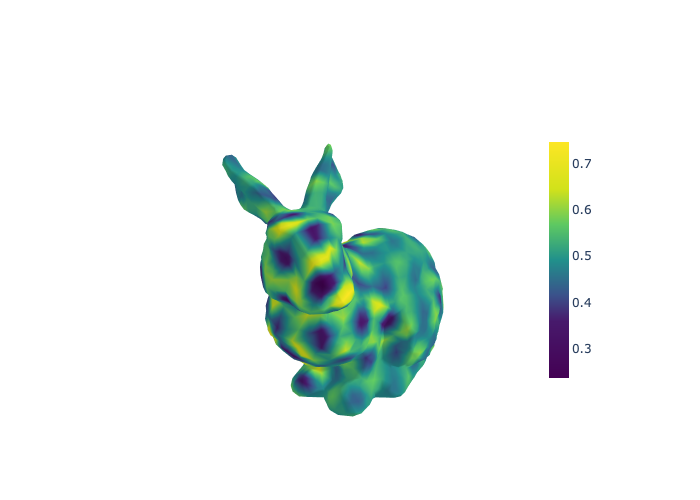

In [5]:
import kaleido
fig = plot_mesh(V, F, func_array, cmin, cmax)
# This produces a png image
fig.show(renderer="png")
# This produces an interactive plot
fig.show()

In [6]:
faces = np.array([[F[0][i],F[1][i],F[2][i]] for i in range(F[0].size)])

In [7]:
signal = np.array([value for key, value in func_dict.items()])

In [8]:
eps = 0.2
tfg = ta.TopologicalFilterGraph()
tfg.compute_gwf(faces, [], signal)
filtered_0 = tfg.low_pers_filter(epsilon = eps)
# filtered_0 = tfg.get_modified_filtration()

In [9]:
# Function_0 = sorted([[int(k),float(v)] for k,v in filtered_0.items()])
# Function_0 = np.array([x[1] for x in Function_0])

Filtered Scalar Fields - after filtering only persistent 0-homology below the threshold eps=0.2


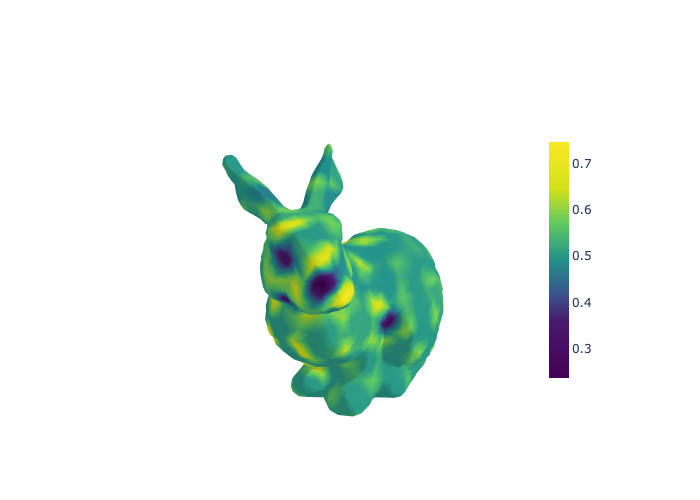

In [10]:
fig2 = plot_mesh(V, F, filtered_0, cmin, cmax)
# This produces an png image
fig2.show(renderer="png")
# This produces an interactive plot
fig2.show()


In [11]:
eps = 0.2
tfgd = ta.TopologicalFilterGraph(dual=True)
tfgd.compute_gwf(faces, [], filtered_0)
filtered_01 = tfgd.low_pers_filter(epsilon = eps)
# _ = tfgd.compute(epsilon = eps, dual=True)=True
# filtered_01 = tfgd.get_modified_filtration()

In [12]:
# Function_01 = sorted([[int(k),float(v)] for k,v in filtered_01.items()])
# Function_01 = np.array([x[1] for x in Function_01])

Filtered Scalar Fields - after filtering both persistent 0- and 1-homology below the threshold eps=0.2


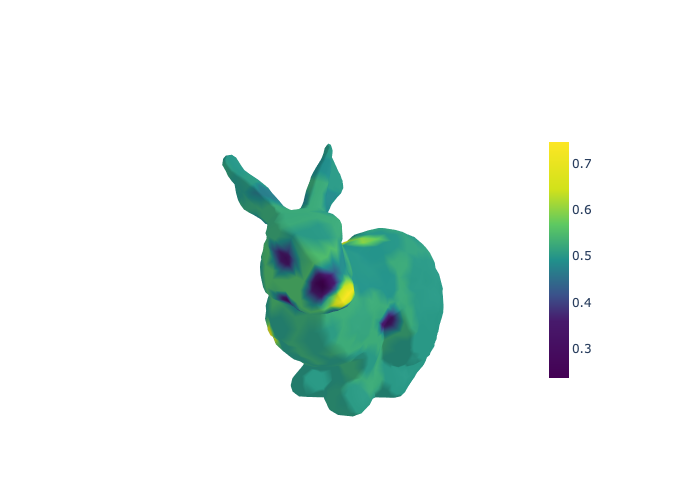

In [13]:
fig3 = plot_mesh(V, F, filtered_01, cmin, cmax)
# This produces a png image
fig3.show(renderer="png")
# This produces an interactive plot
fig3.show()

### Plotting persistence diagrams for the three scalar fields over the mesh

In [ ]:
# Import function for computing persistence diagram of a graph with faces
from topapprox.persistence import get_PD_gwf

In [15]:
PD_original = get_PD_gwf(faces, [], signal)
PD_0 = get_PD_gwf(faces, [], filtered_0)
PD_01 = get_PD_gwf(faces, [], filtered_01)

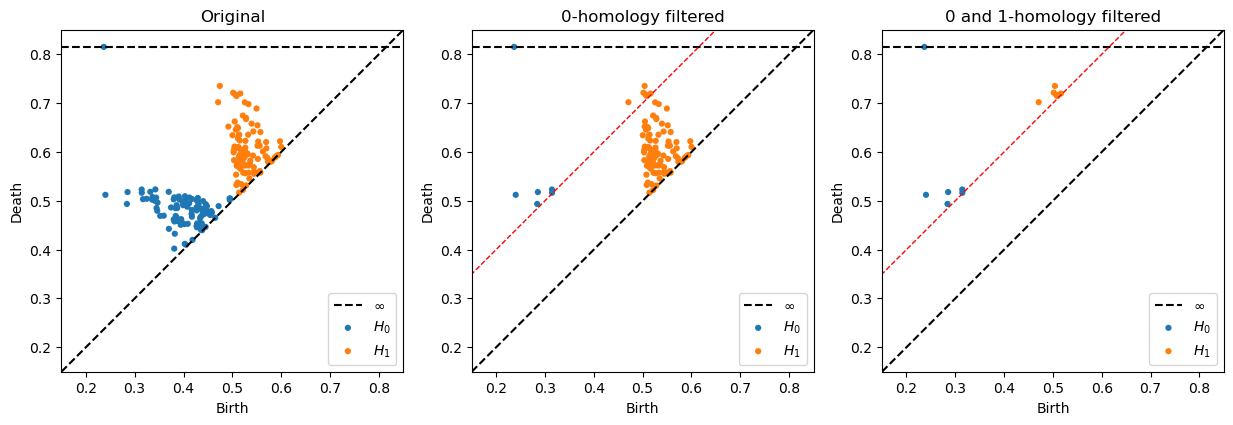

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(15,6))
persim.plot_diagrams(PD_original, ax=ax[0], xy_range = [0.15, 0.85, 0.15, 0.85])
persim.plot_diagrams(PD_0, ax=ax[1], xy_range = [0.15, 0.85, 0.15, 0.85])
persim.plot_diagrams(PD_01, ax=ax[2], xy_range = [0.15, 0.85, 0.15, 0.85])
ax[1].plot([-100,100], [-100+eps,100+eps], '--', linewidth=1.0, c="r")
ax[2].plot([-100,100], [-100+eps,100+eps], '--', linewidth=1.0, c="r")
ax[0].title.set_text('Original')
ax[1].title.set_text('0-homology filtered')
ax[2].title.set_text('0 and 1-homology filtered')

# Size Aware Low Persistence Filter

In [399]:
def plot_diagrams(
    diagrams,
    plot_only=None,
    title=None,
    xy_range=None,
    labels=None,
    colormap="default",
    cmap="viridis",
    size=20,
    marker="o",
    ax_color=np.array([0.0, 0.0, 0.0]),
    diagonal=True,
    lifetime=False,
    legend=True,
    show=False,
    grid=False,
    return_ax=False,
    color_by_value=False,
    ax=None,
    label_color_bar="Value",
    vmin=None,
    vmax=None
):
    import matplotlib.pyplot as plt
    import numpy as np

    ax = ax or plt.gca()
    plt.style.use(colormap)

    xlabel, ylabel = "Birth", "Death"

    if not isinstance(diagrams, list):
        diagrams = [diagrams]

    if labels is None:
        labels = [f"$H_{{{i}}}$" for i, _ in enumerate(diagrams)]

    if plot_only:
        diagrams = [diagrams[i] for i in plot_only]
        labels = [labels[i] for i in plot_only]

    if not isinstance(labels, list):
        labels = [labels] * len(diagrams)

    diagrams = [dgm.astype(np.float32, copy=True) for dgm in diagrams]

    # Use only the first two columns for xy_range computation
    bounds_dgms = [dgm[:, :2] for dgm in diagrams]
    concat_dgms = np.concatenate(bounds_dgms).flatten()
    has_inf = np.any(np.isinf(concat_dgms))
    finite_dgms = concat_dgms[np.isfinite(concat_dgms)]


    if not xy_range:
        ax_min, ax_max = np.min(finite_dgms), np.max(finite_dgms)
        x_r = ax_max - ax_min
        buffer = 1 if x_r == 0 else x_r / 5
        x_down = ax_min - buffer / 2
        x_up = ax_max + buffer
        y_down, y_up = x_down, x_up
    else:
        x_down, x_up, y_down, y_up = xy_range

    yr = y_up - y_down

    if lifetime:
        diagonal = False
        y_down = -yr * 0.05
        y_up = y_down + yr
        ylabel = "Lifetime"
        for dgm in diagrams:
            dgm[:, 1] -= dgm[:, 0]
        ax.plot([x_down, x_up], [0, 0], c=ax_color)

    if diagonal:
        ax.plot([x_down, x_up], [x_down, x_up], "--", c=ax_color)

    if has_inf:
        b_inf = y_down + yr * 0.95
        ax.plot([x_down, x_up], [b_inf, b_inf], "--", c="k", label=r"$\infty$")
        for dgm in diagrams:
            dgm[np.isinf(dgm)] = b_inf

    # Plot each diagram
    for dgm, label in zip(diagrams, labels):
        if color_by_value and dgm.shape[1] >= 3:
            x, y, c_vals = dgm[:, 0], dgm[:, 1], dgm[:, 2]
            sc = ax.scatter(x, y, c=c_vals, cmap=cmap, s=size, marker=marker, edgecolors="black", vmin=vmin, vmax=vmax)
        else:
            x, y = dgm[:, 0], dgm[:, 1]
            sc = ax.scatter(x, y, s=size, label=label, marker=marker, edgecolors="black")

        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)

    ax.set_xlim([x_down, x_up])
    ax.set_ylim([y_down, y_up])
    ax.set_aspect('equal', 'box')

    if grid:
        ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

    if title is not None:
        ax.set_title(title)

    if legend and not color_by_value:
        ax.legend(loc="lower right")

    if color_by_value and sc is not None:
        plt.colorbar(sc, ax=ax, label=label_color_bar)

    if show:
        plt.show()

    if return_ax:
        return ax


## Natural image case (Pagoda)

In [234]:
# download image
download_url = "https://github.com/mvlier/topapprox/raw/main/Paper%20examples/pagoda.npy"
fn = "pagoda.npy"
if not os.path.isfile(fn):
    urllib.request.urlretrieve(download_url, fn)

surface = np.load(fn)

In [276]:
surface.shape

(534, 800)

In [277]:
534*800

427200

In [235]:
tfi = ta.TopologicalFilterImage(surface)
_ = tfi.low_pers_filter(epsilon=0)
PDa = tfi.get_persistence()
PDa = PDa[:,[0,1,4]]

In [250]:
tfi = ta.TopologicalFilterImage(surface, dual=True)
_ = tfi.low_pers_filter(epsilon=0)
PDb = tfi.get_persistence()
PDb = PDb[:,[0,1,4]]

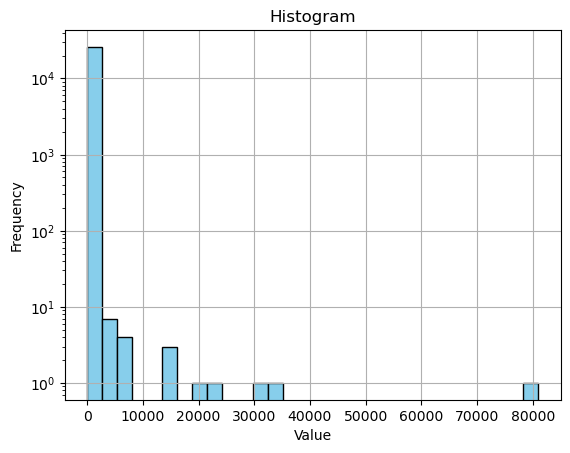

In [341]:
plt.hist(PDa[:,2], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram')
plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

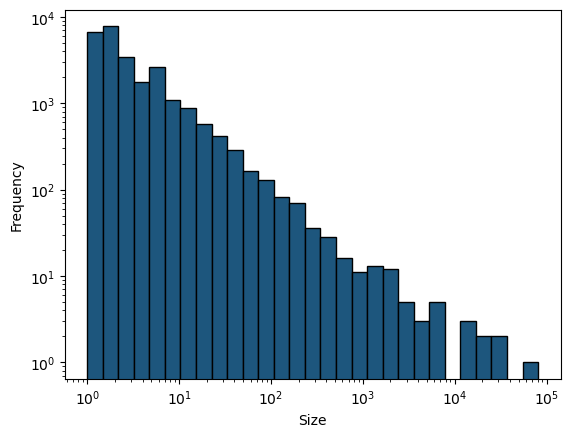

In [349]:
data = PDa[:,2]
MYCOLOR = (29/255, 86/255, 125/255)

# Create logarithmically spaced bins
log_bins = np.logspace(np.log10(data.min()), np.log10(data.max()), num=30)

# Plot histogram with log-scaled bins and x-axis
plt.hist(data, bins=log_bins, color=MYCOLOR, edgecolor='black')
plt.xscale('log')  # Set x-axis to log scale
plt.yscale('log')  # Set y-axis to log scale
# plt.title('Histogram with Log-Scaled X-Axis and Bins')
plt.xlabel('Size')
plt.ylabel('Frequency')
# plt.grid(True, which='both')  # Add grid for both major and minor ticks
plt.savefig('image/persistence_histogram.pdf', bbox_inches='tight')

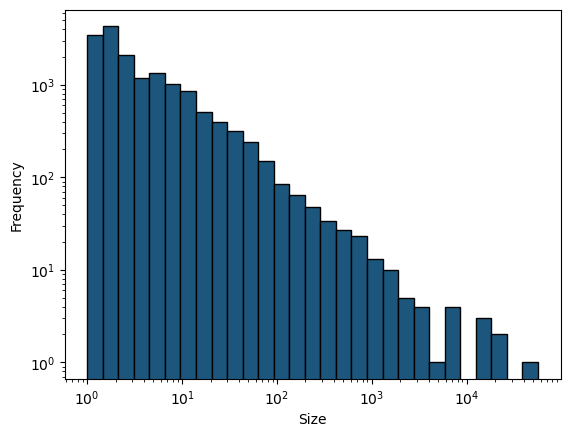

In [350]:
data = PDb[:,2]

# Create logarithmically spaced bins
log_bins = np.logspace(np.log10(data.min()), np.log10(data.max()), num=30)

# Plot histogram with log-scaled bins and x-axis
plt.hist(data, bins=log_bins, color=MYCOLOR, edgecolor='black')
plt.xscale('log')  # Set x-axis to log scale
plt.yscale('log')  # Set y-axis to log scale
# plt.title('Histogram with Log-Scaled X-Axis and Bins')
plt.xlabel('Size')
plt.ylabel('Frequency')
# plt.grid(True, which='both')  # Add grid for both major and minor ticks
plt.savefig('image/persistence_histogram-H1.pdf', bbox_inches='tight')

In [265]:
PDa_sorted = PDa[PDa[:,2].argsort()]
PDb_sorted = PDb[PDb[:,2].argsort()]

In [266]:
PDa_sorted_log = PDa_sorted.copy()
PDa_sorted_log[:,2] = np.log(PDa_sorted_log[:,2])
PDb_sorted_log = PDb_sorted.copy()
PDb_sorted_log[:,2] = np.log(PDb_sorted_log[:,2])

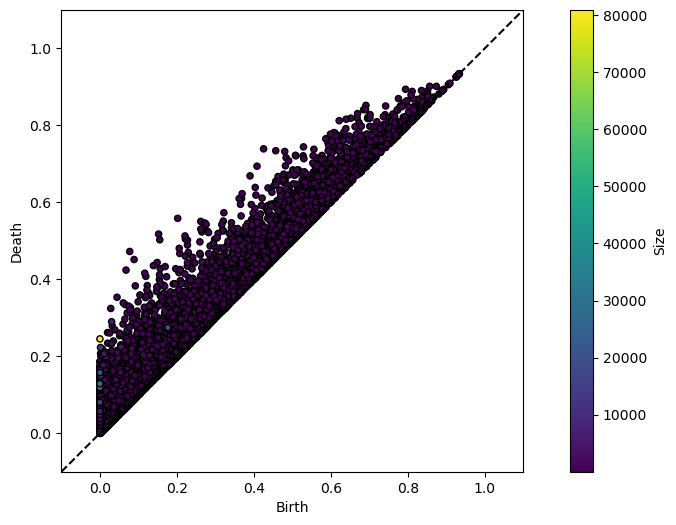

In [272]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
plot_diagrams(PDa_sorted[PDa_sorted[:,2]>-1], color_by_value=True, cmap="viridis", size=20, title="", ax=ax, xy_range=[-0.1, 1.1, -0.1, 1.1], label_color_bar = "Size")
plt.savefig('image/pagoda_pd_0_sizes.pdf', bbox_inches='tight')

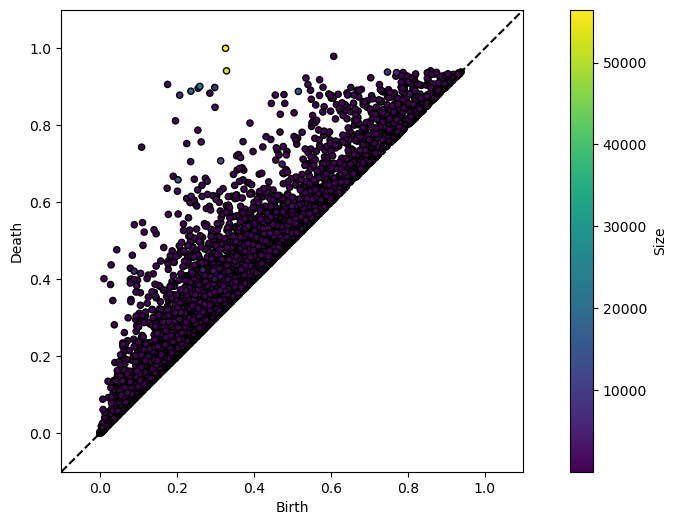

In [273]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
plot_diagrams(PDb_sorted[PDb_sorted[:,2]>-1], color_by_value=True, cmap="viridis", size=20, title="", ax=ax, xy_range=[-0.1, 1.1, -0.1, 1.1], label_color_bar = "Size")
plt.savefig('image/pagoda_pd_1_sizes.pdf', bbox_inches='tight')

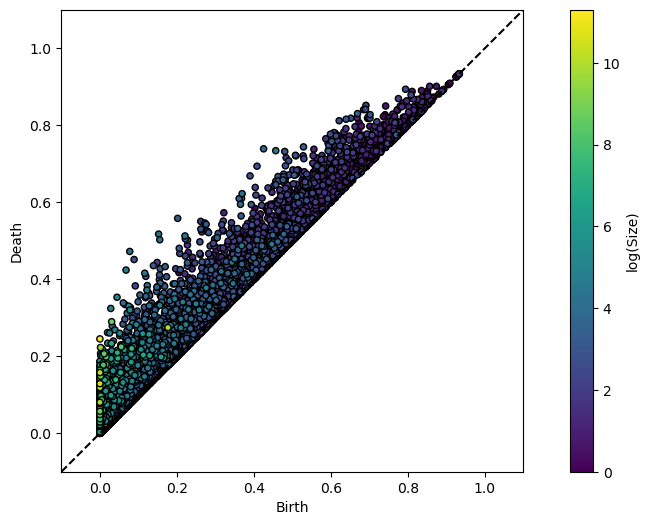

In [331]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
plot_diagrams(PDa_sorted_log[PDa_sorted_log[:,2]>-1], color_by_value=True, cmap="viridis", size=20, title="", ax=ax, xy_range=[-0.1, 1.1, -0.1, 1.1], label_color_bar = "log(Size)")
plt.savefig('image/pagoda_pd_0_sizes_logscale.png', bbox_inches='tight', dpi=300)

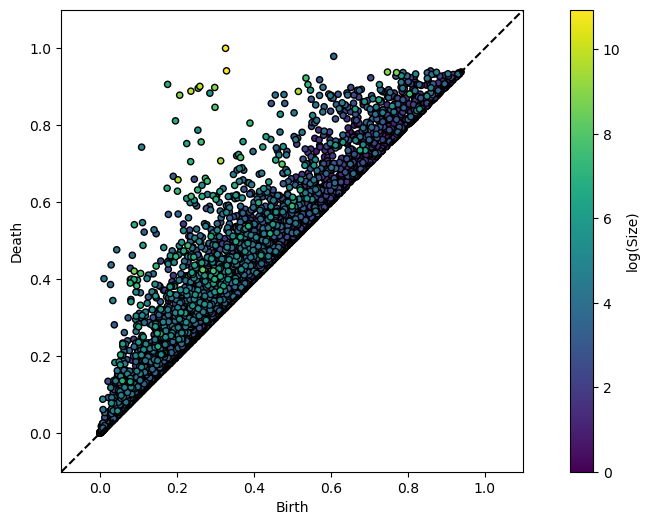

In [332]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
plot_diagrams(PDb_sorted_log[PDb_sorted_log[:,2]>-1], color_by_value=True, cmap="viridis", size=20, title="", ax=ax, xy_range=[-0.1, 1.1, -0.1, 1.1], label_color_bar = "log(Size)")
plt.savefig('image/pagoda_pd_1_sizes_logscale.png', bbox_inches='tight', dpi=300)

In [312]:
PDa2 = PDa_sorted[PDa_sorted[:,2]<100]

In [316]:
# Checking correlation between persistence and size
pers = PDa_sorted[:,1] - PDa_sorted[:,0]
size = PDa_sorted[:,2]
correlation = np.corrcoef(pers, size)[0, 1]

In [313]:
# Checking correlation between persistence and size
pers = PDa2[:,1] - PDa2[:,0]
size = PDa2[:,2]
correlation = np.corrcoef(pers, size)[0, 1]

In [317]:
correlation

0.08725119907251608

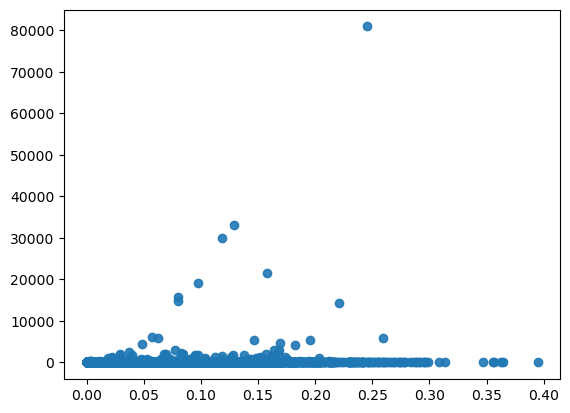

In [330]:
plt.scatter(pers, size, alpha=0.9)
# plt.yscale('log')
plt.savefig('image/pagoda_size_correlation.png', bbox_inches='tight', dpi=300)

In [280]:
correlation

0.08725119907251608

In [325]:
# Checking correlation between persistence and size
persb = PDb_sorted[:,1] - PDb_sorted[:,0]
sizeb = PDb_sorted[:,2]
correlationb = np.corrcoef(persb, sizeb)[0, 1]

In [326]:
correlationb

0.2693206559707378

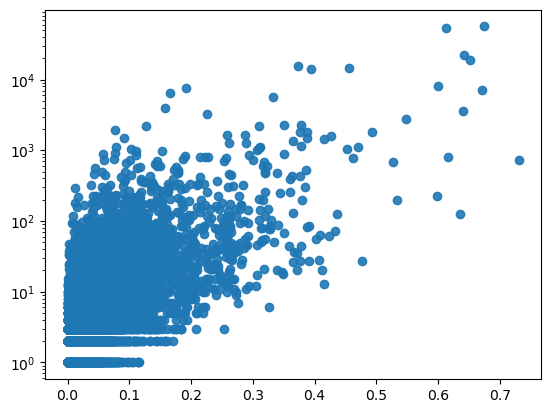

In [334]:
plt.scatter(persb, sizeb, alpha=0.9)
plt.yscale('log')
plt.savefig('image/pagoda_size_correlation_log-1.png', bbox_inches='tight', dpi=300)

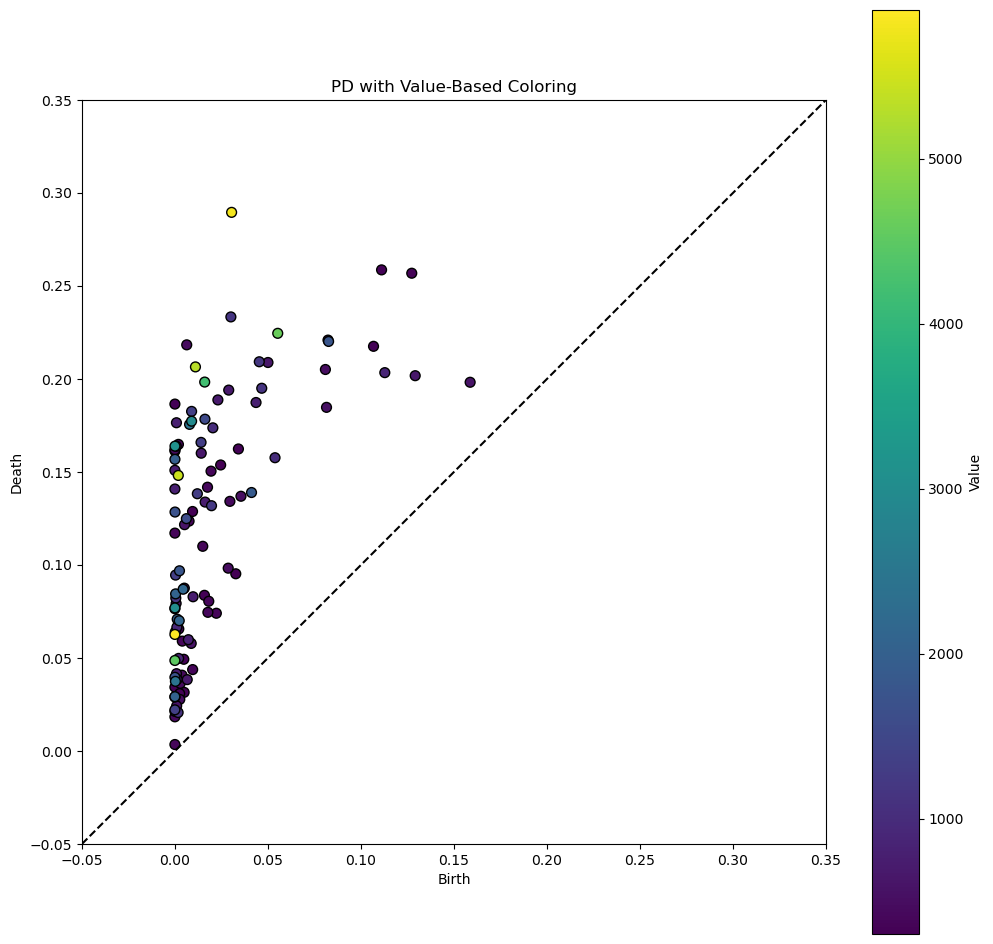

In [223]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
plot_diagrams(PDa_sorted[(PDa_sorted[:,2] > 300) & (PDa_sorted[:,2] < 6000)], color_by_value=True, cmap="viridis", size=50, title="PD with Value-Based Coloring", ax=ax, xy_range=[-0.05, 0.35, -0.05, 0.35])

In [574]:
def plot_sizer_aware_filter(surface, eta, epsilon, name_prefix, save=False, show=True):
    """
    Plots the size-aware filtering of a surface using topological persistence.
    Args:
        surface (numpy.ndarray): The surface to be filtered.
        eta (int): The maximum size of features to be retained.
        epsilon (float): The threshold for filtering.
    """
    img_name = name_prefix + f"_size_filtered_{eta}_{str(epsilon).replace('.', '')}"
    tfi = ta.TopologicalFilterImage(surface)
    filterd_surface = tfi.low_pers_filter(epsilon=epsilon, size_range=[0, eta])
    tfi2 = ta.TopologicalFilterImage(filterd_surface, dual=True)
    filterd_surface = tfi2.low_pers_filter(epsilon=epsilon, size_range=[0, eta])

    pd0 = tfi.get_persistence()
    pd1 = tfi2.get_persistence()
    if pd0.size:
       sizes0 = np.log(tfi.get_persistence()[:, 4])
    else:
        sizes0 = np.array([])
    if pd1.size:
        sizes1 = np.log(tfi2.get_persistence()[:, 4])
    else:
        sizes1 = np.array([])
    if sizes0.size or sizes1.size:
        sizes = np.concatenate((sizes0, sizes1))
        vmin = np.min(sizes)
        vmax = np.max(sizes)
    else:
        vmin = None
        vmax = None


    tfi_H0 = ta.TopologicalFilterImage(filterd_surface)
    tfi_H1 = ta.TopologicalFilterImage(filterd_surface, dual=True)
    _ = tfi_H0.low_pers_filter(0)
    PD_H0 = tfi_H0.get_persistence()
    if PD_H0.size:
        PD_H0 = PD_H0[:,[0,1,4]]
        PD_H0 = PD_H0[PD_H0[:,2].argsort()]
        PD_H0[:,2] = np.log(PD_H0[:,2])
    else: # Workaround for empty persistence diagrams
        PD_H0 = np.array([[10000,10000,0]])
    _ = tfi_H1.low_pers_filter(0)
    PD_H1 = tfi_H1.get_persistence()
    if PD_H1.size:
        PD_H1 = PD_H1[:,[0,1,4]]
        PD_H1 = PD_H1[PD_H1[:,2].argsort()]
        PD_H1[:,2] = np.log(PD_H1[:,2])
    else:
        PD_H1 = np.array([[10000,10000,0]])

    fig, ax = plt.subplots(1, 3, figsize=(19, 4))
    ax[0].imshow(filterd_surface, cmap='inferno')
    ax[0].axis('off')
    if PD_H0.size:
        plot_diagrams(PD_H0, size=20, ax=ax[1], xy_range=[-0.1, 1.1, -0.1, 1.1], label_color_bar="Log(Size)", color_by_value=True, cmap="viridis", vmin=vmin, vmax=vmax)
    else:
        plot_diagrams(PD_H0, size=20, ax=ax[1], xy_range=[-0.1, 1.1, -0.1, 1.1])
    ax[1].plot([-100, 100], [-100 + epsilon, 100 + epsilon], '--', linewidth=1.0, c="r", label="threshold")
    ax[1].legend(loc="lower right")
    if PD_H1.size:
        plot_diagrams(PD_H1, size=20, ax=ax[2], xy_range=[-0.1, 1.1, -0.1, 1.1], label_color_bar="Log(Size)", color_by_value=True, cmap="viridis", vmin=vmin, vmax=vmax)
    else:
        plot_diagrams(PD_H1, size=20, ax=ax[2], xy_range=[-0.1, 1.1, -0.1, 1.1])
    ax[2].plot([-100, 100], [-100 + epsilon, 100 + epsilon], '--', linewidth=1.0, c="r", label="threshold")
    ax[2].legend(loc="lower right")
    if save:
        #create directory if it does not exist
        os.makedirs('image/size_filtered_'+name_prefix, exist_ok=True)
        plt.savefig(f'image/size_filtered_{name_prefix}/{img_name}.png', bbox_inches='tight', dpi=300)
    if show:
        plt.show()
    plt.close()

In [503]:
a = np.zeros((10,10))
# a = np.random.rand(10,10)
tfi_H0 = ta.TopologicalFilterImage(a)
_ = tfi_H0.low_pers_filter(0)
PD_H0 = tfi_H0.get_persistence()
if PD_H0.size:
    print("yes")


9

In [403]:
etas = [10,100,500,1000,10000]
epsilons = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 2.0]
for eta in etas:
    for epsilon in epsilons:
        print(f"Filtering with eta={eta}, epsilon={epsilon}")
        plot_sizer_aware_filter(surface, eta=eta, epsilon=epsilon, name_prefix="pagoda", save=True)

Filtering with eta=10, epsilon=0.1
Filtering with eta=10, epsilon=0.2
Filtering with eta=10, epsilon=0.3
Filtering with eta=10, epsilon=0.4
Filtering with eta=10, epsilon=0.5
Filtering with eta=10, epsilon=0.6
Filtering with eta=10, epsilon=0.7
Filtering with eta=10, epsilon=0.8
Filtering with eta=10, epsilon=0.9
Filtering with eta=10, epsilon=2.0
Filtering with eta=100, epsilon=0.1
Filtering with eta=100, epsilon=0.2
Filtering with eta=100, epsilon=0.3
Filtering with eta=100, epsilon=0.4
Filtering with eta=100, epsilon=0.5
Filtering with eta=100, epsilon=0.6
Filtering with eta=100, epsilon=0.7
Filtering with eta=100, epsilon=0.8
Filtering with eta=100, epsilon=0.9
Filtering with eta=100, epsilon=2.0
Filtering with eta=500, epsilon=0.1
Filtering with eta=500, epsilon=0.2
Filtering with eta=500, epsilon=0.3
Filtering with eta=500, epsilon=0.4
Filtering with eta=500, epsilon=0.5
Filtering with eta=500, epsilon=0.6
Filtering with eta=500, epsilon=0.7
Filtering with eta=500, epsilon=0.8
Fi

## Synthetic example

In [505]:
# Defining the scalar field to be used in the example
def scalar_field2(x,y):
    np.random.seed(42)
    MM = [30, 30, 20, 300, 300]
    M = sum(MM)
    bb = [0.1, 1, 10, 100, 1000]
    a = np.random.rand(M,2)*10
    b = np.array([])
    c = np.random.rand(M)*0.3 + 0.1
    for i in range(len(MM)):
        b = np.concatenate((b, (1+np.random.rand(MM[i]))*bb[i] + 0.1))
    m = c.size
    result = 0
    for i in range(m):
        result += 1 / (b[i]*(x - a[i][0])**2 + b[i]*(y - a[i][1])**2 + c[i])

    a = np.random.rand(M,2)*10
    b = np.array([])
    c = np.random.rand(M)*0.3 + 0.1
    for i in range(len(MM)):
        b = np.concatenate((b, (1+np.random.rand(MM[i]))*bb[i] + 0.1))
    m = c.size
    result2 = 0
    for i in range(m):
        result2 += 1 / (b[i]*(x - a[i][0])**2 + b[i]*(y - a[i][1])**2 + c[i])

    Z = result - result2
    # Z2 = (x-5)**2 + 3*(y-5)**2
    # Z = Z + Z2

    return Z

x = np.linspace(0, 10, 500)
y = np.linspace(0, 10, 500)
X, Y = np.meshgrid(x, y)
surface = scalar_field2(X, Y)

#normalizing the surface
surface = (surface - np.min(surface)) / (np.max(surface) - np.min(surface))

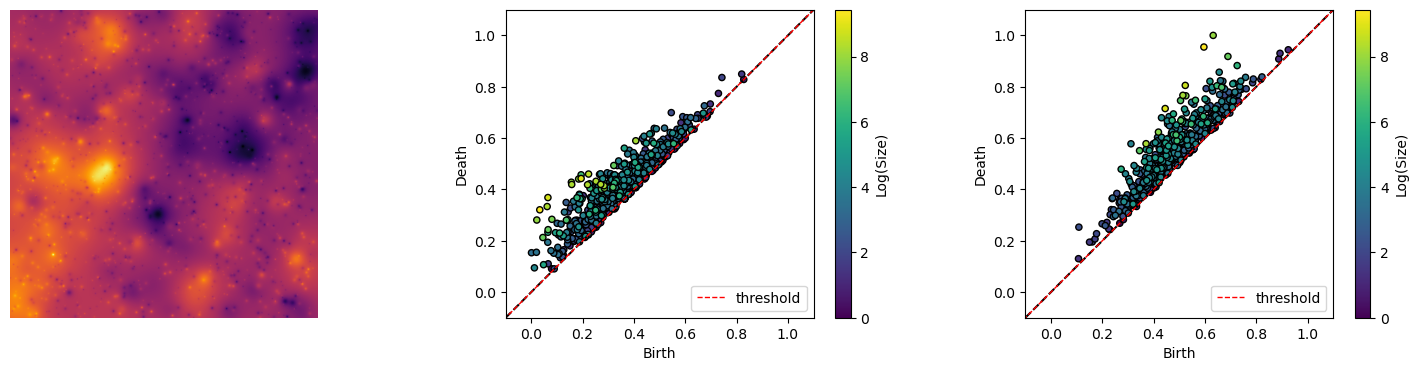

In [518]:
eta = 0
epsilon = 0
plot_sizer_aware_filter(surface, eta=eta, epsilon=epsilon, name_prefix="shekel")

In [524]:
etas = [2000,4000,6000,8000]
epsilons = [0.0, 0.1, 0.2, 0.3, 0.5]
for eta in etas:
    print(f"Filtering with eta={eta}")
    for epsilon in epsilons:
        plot_sizer_aware_filter(surface, eta=eta, epsilon=epsilon, name_prefix="shekel", save=True, show=False)

Filtering with eta=2000
Filtering with eta=4000
Filtering with eta=6000
Filtering with eta=8000


In [527]:
def size_aware_filter(surface, eta, epsilon):
    """
    Applies size-aware filtering to a surface using topological persistence.
    Args:
        surface (numpy.ndarray): The surface to be filtered.
        eta (int): The maximum size of features to be retained.
        epsilon (float): The threshold for filtering.
    """
    tfi = ta.TopologicalFilterImage(surface)
    filterd_surface = tfi.low_pers_filter(epsilon=epsilon, size_range=[0, eta])
    tfi2 = ta.TopologicalFilterImage(filterd_surface, dual=True)
    filterd_surface = tfi2.low_pers_filter(epsilon=epsilon, size_range=[0, eta])

    return filterd_surface

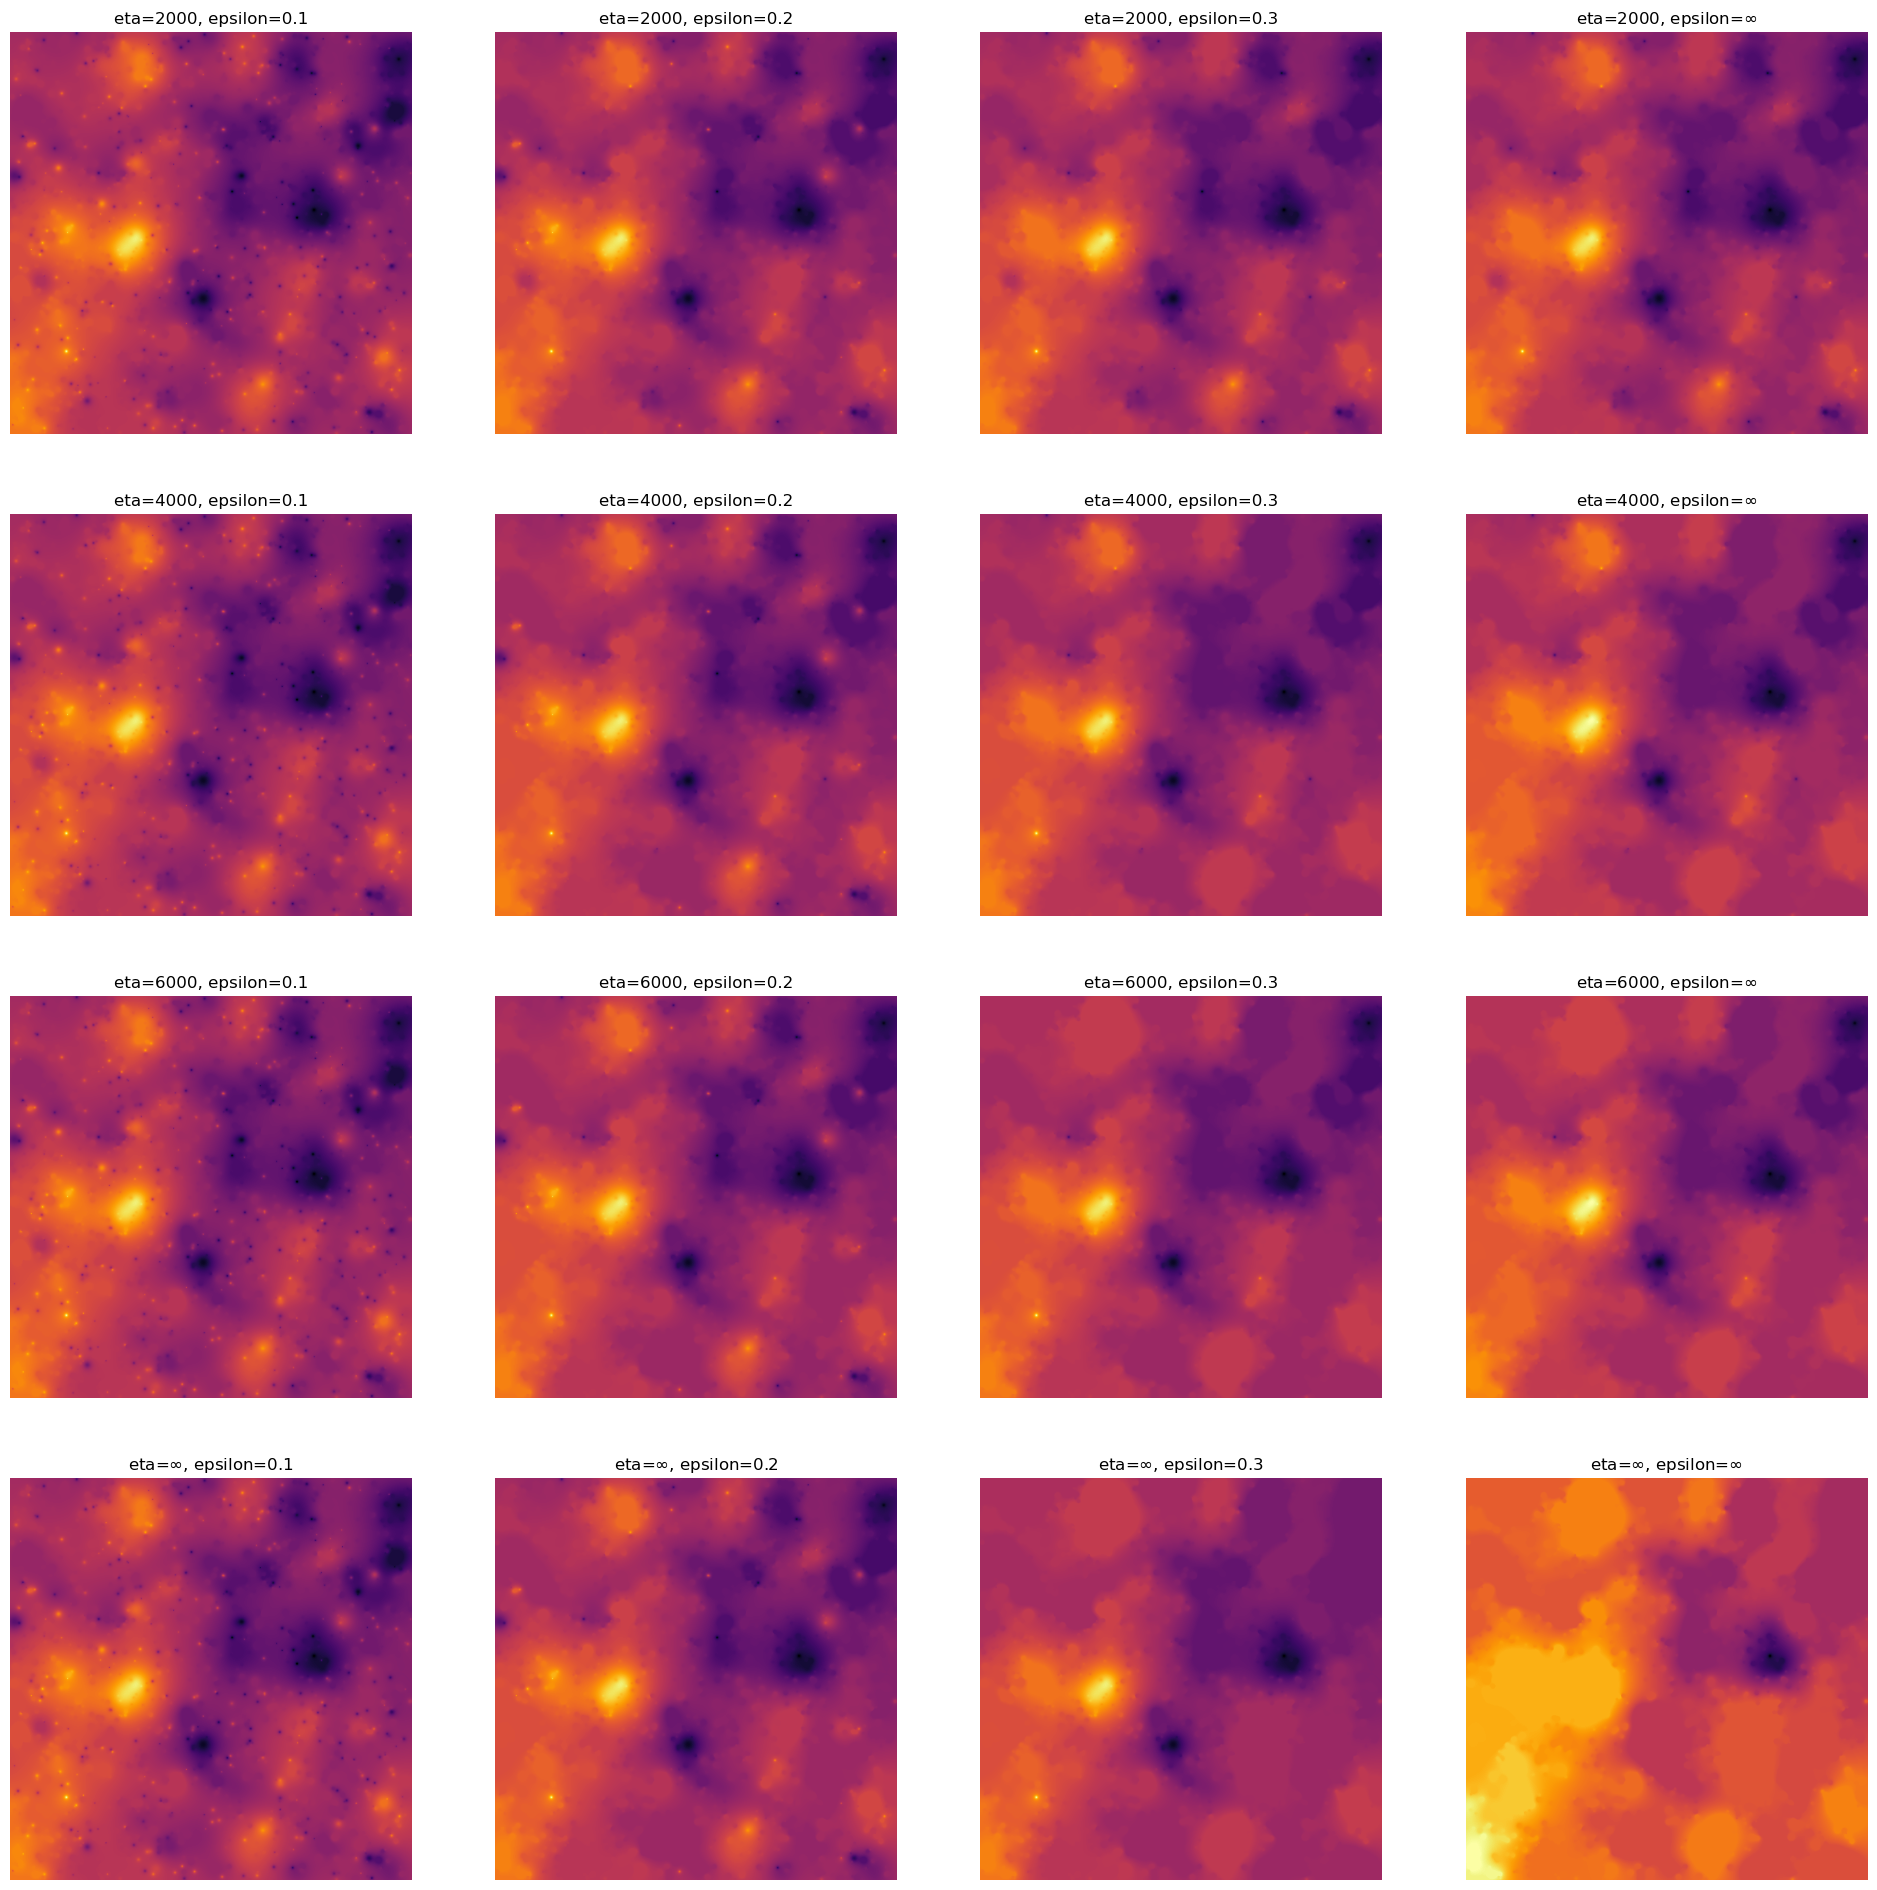

In [532]:
fig, ax = plt.subplots(4, 4, figsize=(24, 24))
etas = [2000, 4000, 6000, 100000]
epsilons = [0.1, 0.2, 0.3, 0.5]
for i, eta in enumerate(etas):
    for j, epsilon in enumerate(epsilons):
        filtered_surface = size_aware_filter(surface, eta=eta, epsilon=epsilon)
        if epsilon == 0.5:
            epsilon = '$\infty$'
        eta_label = '$\infty$' if eta == 100000 else eta
        ax[i, j].imshow(filtered_surface, cmap='inferno')
        ax[i, j].axis('off')
        ax[i, j].set_title(f"eta={eta_label}, epsilon={epsilon}")


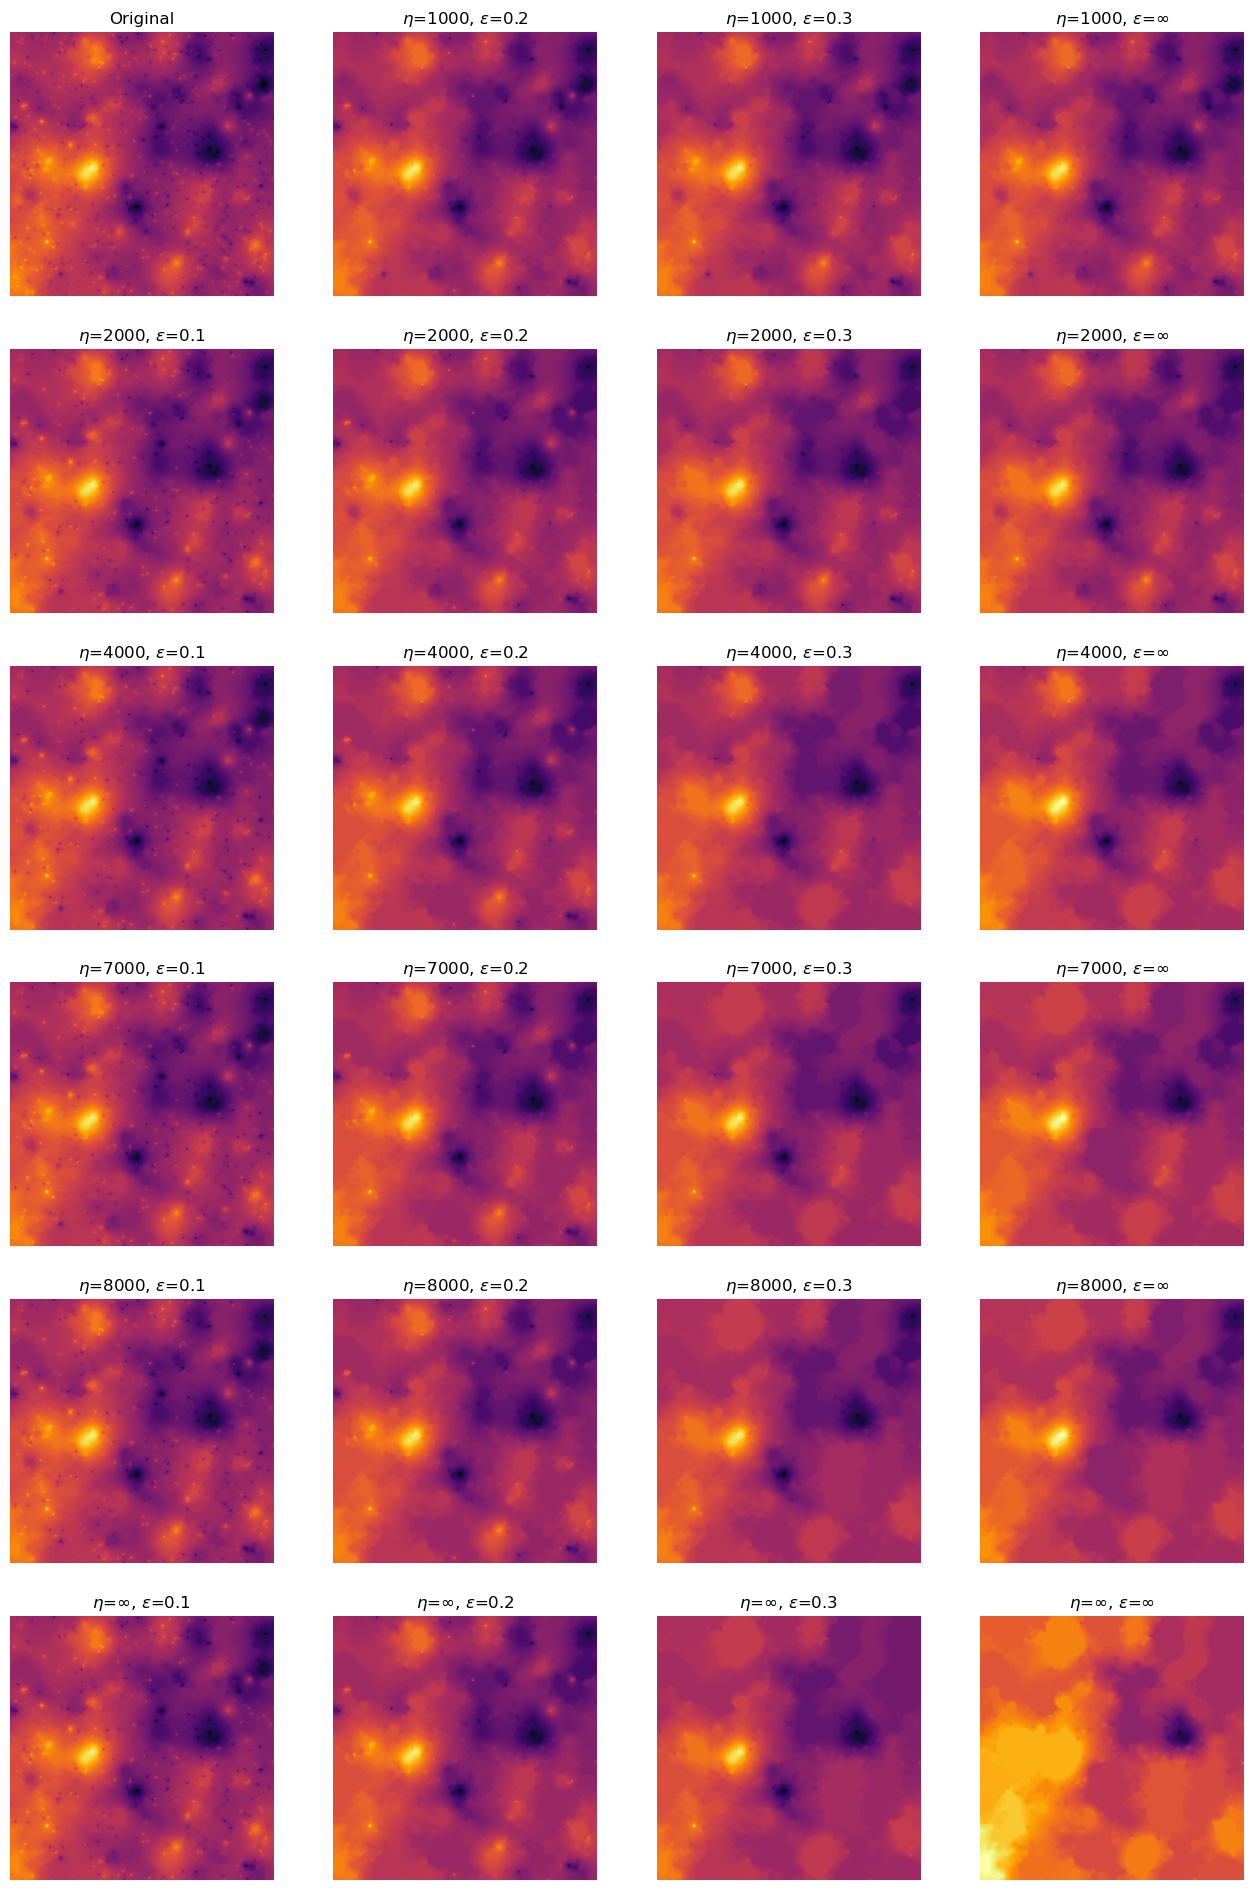

In [544]:
fig, ax = plt.subplots(6, 4, figsize=(16, 24))
etas = [1000, 2000, 4000, 7000, 8000, 100000]
epsilons = [0.1, 0.2, 0.3, 0.5]
for i, eta in enumerate(etas):
    for j, epsilon in enumerate(epsilons):
        filtered_surface = size_aware_filter(surface, eta=eta, epsilon=epsilon)
        if epsilon == 0.5:
            epsilon = '$\infty$'
        eta_label = '$\infty$' if eta == 100000 else eta
        ax[i, j].imshow(filtered_surface, cmap='inferno')
        ax[i, j].axis('off')
        ax[i, j].set_title(f"$\eta$={eta_label}, $\\varepsilon$={epsilon}")
ax[0,0].imshow(surface, cmap='inferno')
ax[0,0].axis('off')
ax[0,0].set_title("Original")

plt.savefig('image/shekel_size_aware_filtering_grid.pdf', bbox_inches='tight')

## Second synthetic example

In [548]:
import numpy as np

def push_region(surface, center, radius, min_value, max_value):
    """
    Modifies a circular region of the surface by degrading toward the center.
    The value is minimum at the center and increases radially to max_value.

    Args:
        surface (numpy.ndarray): The surface to be modified.
        center (tuple): The center of the region (x, y).
        radius (float): The radius of the region.
        min_value (float): The value at the center.
        max_value (float): The value at the boundary of the region.
    """
    x, y = np.indices(surface.shape)
    dx = x - center[0]
    dy = y - center[1]
    dist = np.sqrt(dx**2 + dy**2)

    # Create a mask for points within the radius
    mask = dist < radius

    # Normalize distance: 0 at center, 1 at radius
    norm_dist = dist[mask] / radius

    # Interpolate from min_value to max_value based on distance
    degraded_values = min_value + (max_value - min_value) * norm_dist

    # Apply the degraded values to the surface
    surface[mask] += degraded_values


max: 1.0, min: 0.0


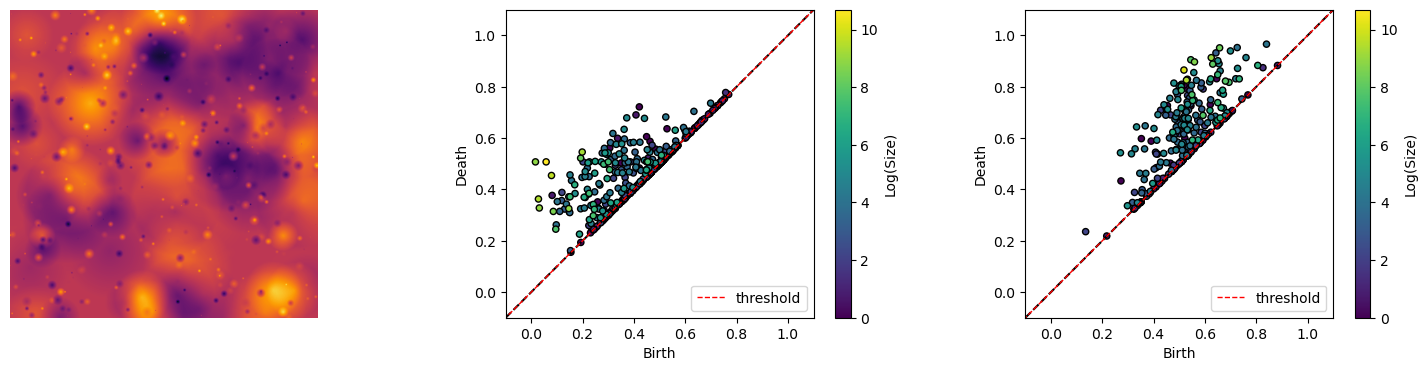

In [636]:


# 0-homology classes
# push_region(surface, center=(50, 50), radius=40, min_value=-0.5, max_value=0.0)
# push_region(surface, center=(50, 150), radius=40, min_value=-0.5, max_value=0.0)
# push_region(surface, center=(50, 250), radius=40, min_value=-0.5, max_value=0.0)
# push_region(surface, center=(50, 350), radius=40, min_value=-0.5, max_value=0.0)
# push_region(surface, center=(50, 450), radius=40, min_value=-0.5, max_value=0.0)
# push_region(surface, center=(150, 50), radius=40, min_value=-0.5, max_value=0.0)
# push_region(surface, center=(150, 150), radius=40, min_value=-0.5, max_value=0.0)
# push_region(surface, center=(150, 250), radius=40, min_value=-0.5, max_value=0.0)
# push_region(surface, center=(150, 350), radius=40, min_value=-0.5, max_value=0.0)
# push_region(surface, center=(150, 450), radius=40, min_value=-0.5, max_value=0.0)
# push_region(surface, center=(250, 50), radius=40, min_value=-0.5, max_value=0.0)
# push_region(surface, center=(250, 150), radius=40, min_value=-0.5, max_value=0.0)
# push_region(surface, center=(250, 250), radius=40, min_value=-0.5, max_value=0.0)
# push_region(surface, center=(250, 350), radius=40, min_value=-0.5, max_value=0.0)
# push_region(surface, center=(250, 450), radius=40, min_value=-0.5, max_value=0.0)
# push_region(surface, center=(350, 50), radius=40, min_value=-0.5, max_value=0.0)
# push_region(surface, center=(350, 150), radius=40, min_value=-0.5, max_value=0.0)
# push_region(surface, center=(350, 250), radius=40, min_value=-0.5, max_value=0.0)
# push_region(surface, center=(350, 350), radius=40, min_value=-0.5, max_value=0.0)
# push_region(surface, center=(350, 450), radius=40, min_value=-0.5, max_value=0.0)
# push_region(surface, center=(450, 50), radius=40, min_value=-0.5, max_value=0.0)
# push_region(surface, center=(450, 150), radius=40, min_value=-0.5, max_value=0.0)
# push_region(surface, center=(450, 250), radius=40, min_value=-0.5, max_value=0.0)
# push_region(surface, center=(450, 350), radius=40, min_value=-0.5, max_value=0.0)
# push_region(surface, center=(450, 450), radius=40, min_value=-0.5, max_value=0.0)


# # 1-homology classes
# push_region(surface, center=(200, 200), radius=40, min_value=0.5, max_value=0.0)

N = 90
d = 500
np.random.seed(42)  # For reproducibility
surface = np.zeros((d,d))
centers = np.random.randint(0, d, size=(N, 2))
radii = np.random.randint(20, 80, size=N)
min_values = np.random.uniform(-1.0, 1.0, size=N)
max_value = 0.0
for center, radius, min_value in zip(centers, radii, min_values):
    push_region(surface, center=center, radius=radius, min_value=min_value, max_value=max_value)


N = 400
centers = np.random.randint(0, d, size=(N, 2))
radii = np.random.randint(0.5, 10, size=N)
min_values = np.random.uniform(-1.0, 1.0, size=N)
max_value = 0.0
for center, radius, min_value in zip(centers, radii, min_values):
    push_region(surface, center=center, radius=radius, min_value=min_value, max_value=max_value)

# normalizing the surface
surface = (surface - np.min(surface)) / (np.max(surface) - np.min(surface))


eta = 0
epsilon = 0
print(f"max: {np.max(surface)}, min: {np.min(surface)}")
plot_sizer_aware_filter(surface, eta=eta, epsilon=epsilon, name_prefix="degrade")

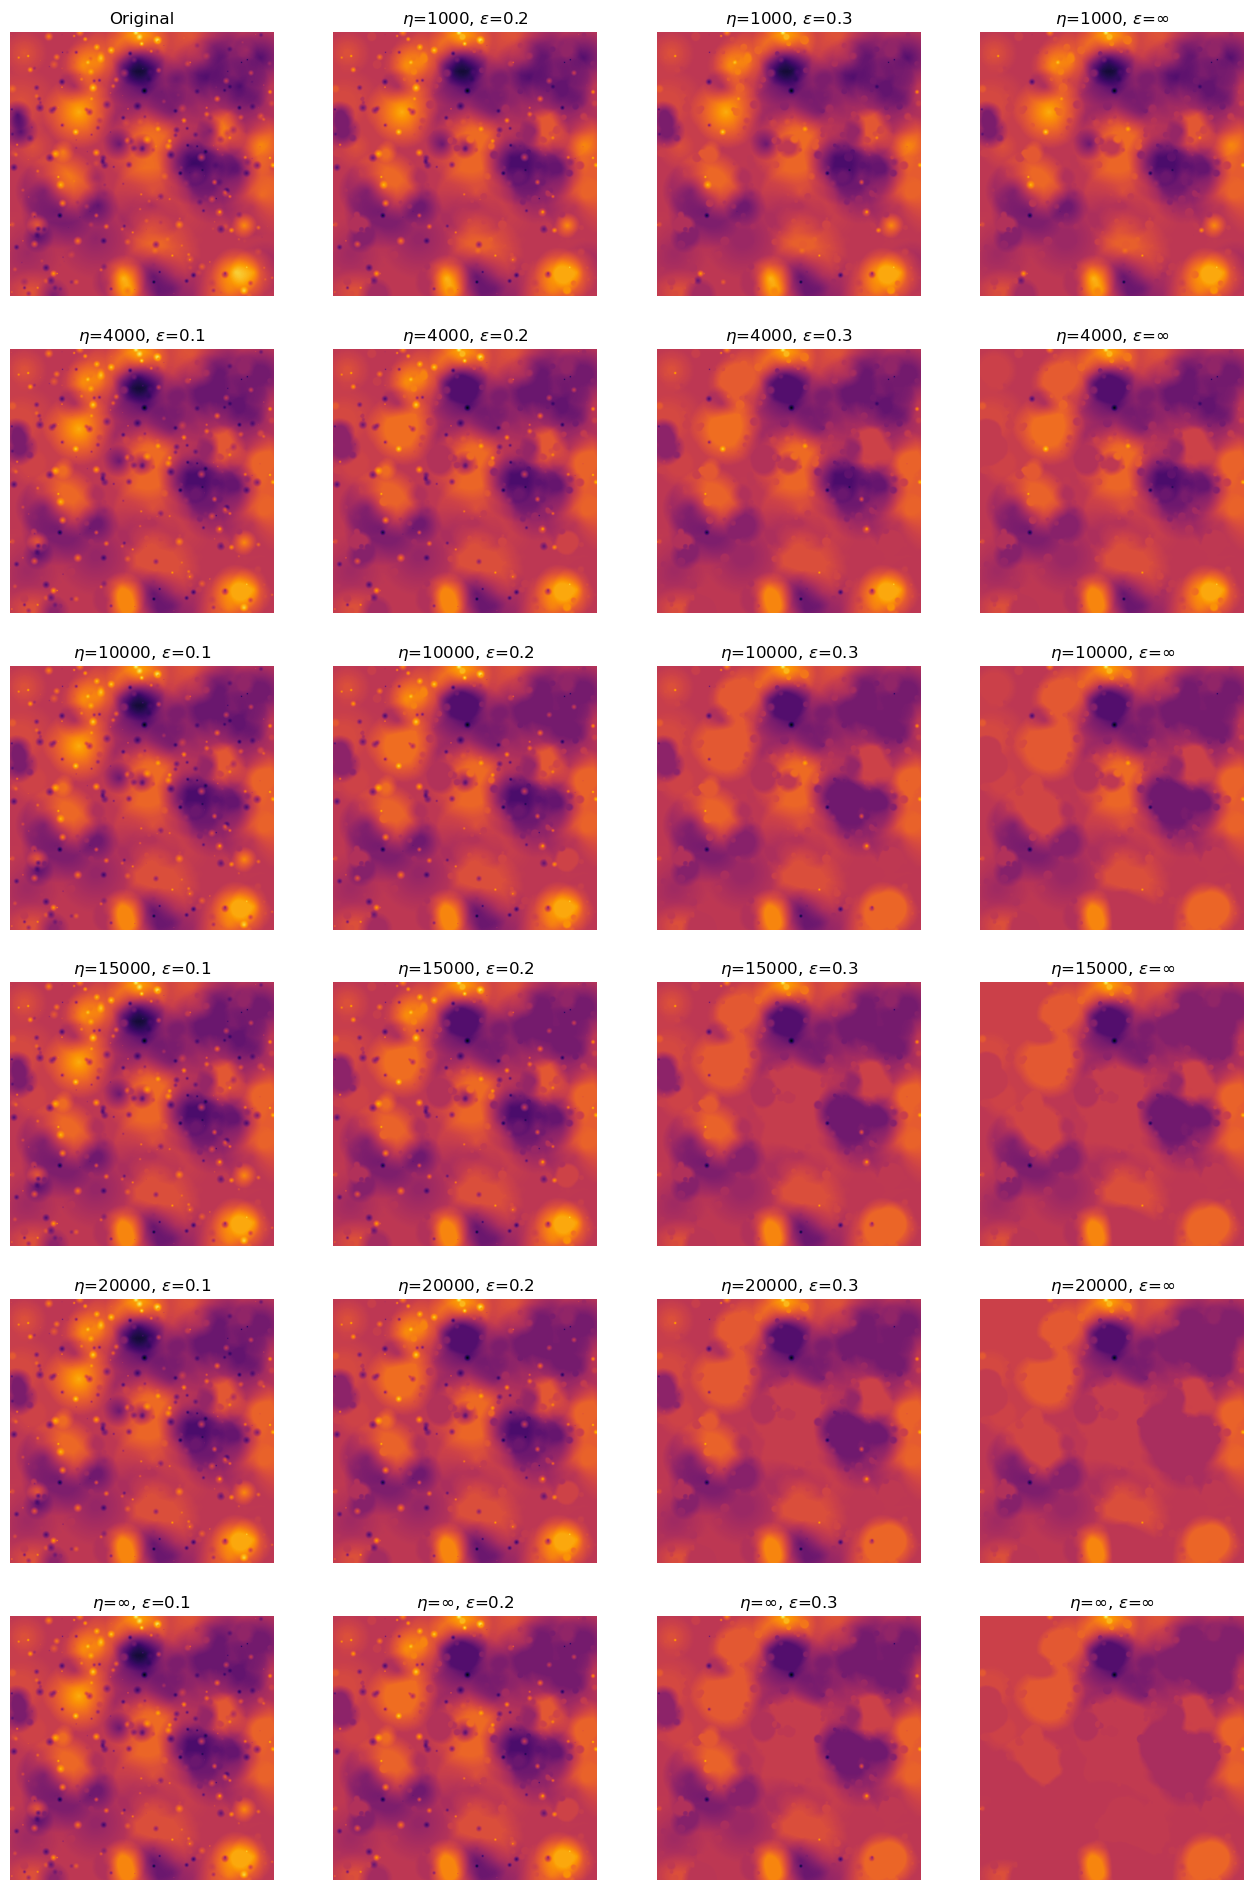

In [643]:
fig, ax = plt.subplots(6, 4, figsize=(16, 24))
etas = [1000, 4000, 10000, 15000, 20000, 100000]
epsilons = [0.1, 0.2, 0.3, 0.5]
v_min = np.min(surface)
v_max = np.max(surface)
for i, eta in enumerate(etas):
    for j, epsilon in enumerate(epsilons):
        filtered_surface = size_aware_filter(surface, eta=eta, epsilon=epsilon)
        if epsilon == 0.5:
            epsilon = '$\infty$'
        eta_label = '$\infty$' if eta == 100000 else eta
        ax[i, j].imshow(filtered_surface, cmap='inferno', vmin=v_min, vmax=v_max)
        ax[i, j].axis('off')
        ax[i, j].set_title(f"$\eta$={eta_label}, $\\varepsilon$={epsilon}")
ax[0,0].imshow(surface, cmap='inferno', vmin=v_min, vmax=v_max)
ax[0,0].axis('off')
ax[0,0].set_title("Original")

plt.savefig('image/degrade_size_aware_filtering_grid.pdf', bbox_inches='tight')

In [642]:
etas = [1000]
epsilons = [0.0, 0.1, 0.2, 0.3, 0.5]
for eta in etas:
    print(f"Filtering with eta={eta}")
    for epsilon in epsilons:
        plot_sizer_aware_filter(surface, eta=eta, epsilon=epsilon, name_prefix="degrade", save=True, show=False)

Filtering with eta=1000
